**Sleep Efficiency EDA**
by Kaylah Patel, Nico Motta, Daniel Zhao

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
# Load Sleep_Efficiency.csv and display the data head

from google.colab import files
files.upload()

df = pd.read_csv('/content/Sleep_Efficiency.csv')
df.head()

Saving Sleep_Efficiency.csv to Sleep_Efficiency (2).csv


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [ ]:
# Print the high-level information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

Distribution Analysis

count    452.000000
mean       0.788916
std        0.135237
min        0.500000
25%        0.697500
50%        0.820000
75%        0.900000
max        0.990000
Name: Sleep efficiency, dtype: float64


Text(0.5, 1.0, 'Histogram and continuous interpolation of Sleep Efficiency')

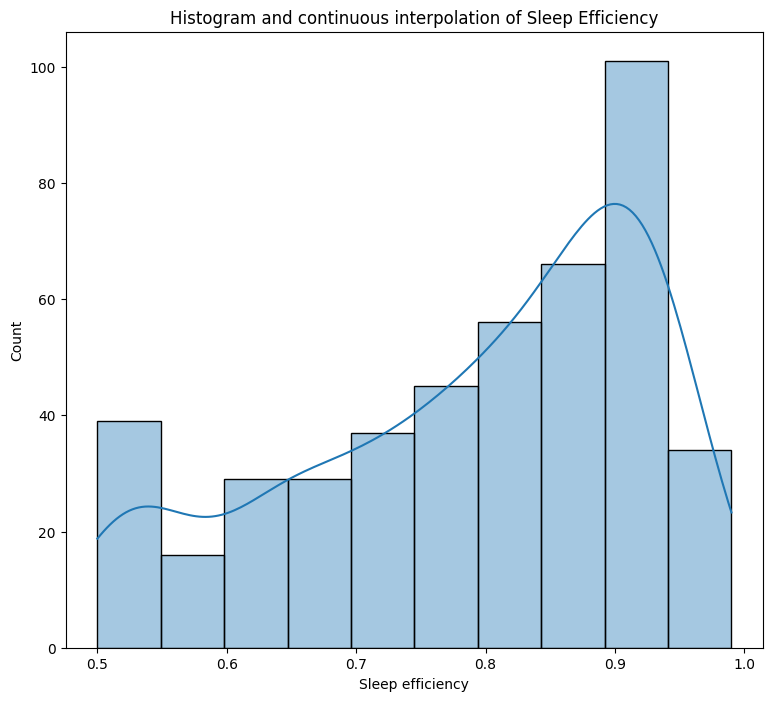

In [ ]:
#Look at distribution of sleef efficiency
print(df['Sleep efficiency'].describe())
plt.figure(figsize=(9, 8))
############################## write your code ###########################
# TODO: Plot the distribution of housing price (SalePrice) [Hint: you can use
#   https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot
# Use "kde=True" to plot both a histogram & continuous interpolation,
#   and "alpha = 0.4" to see both together
sns.histplot(data = df['Sleep efficiency'], kde = True, alpha = 0.4)
plt.title("Histogram and continuous interpolation of Sleep Efficiency")

<Axes: xlabel='Exercise frequency', ylabel='Count'>

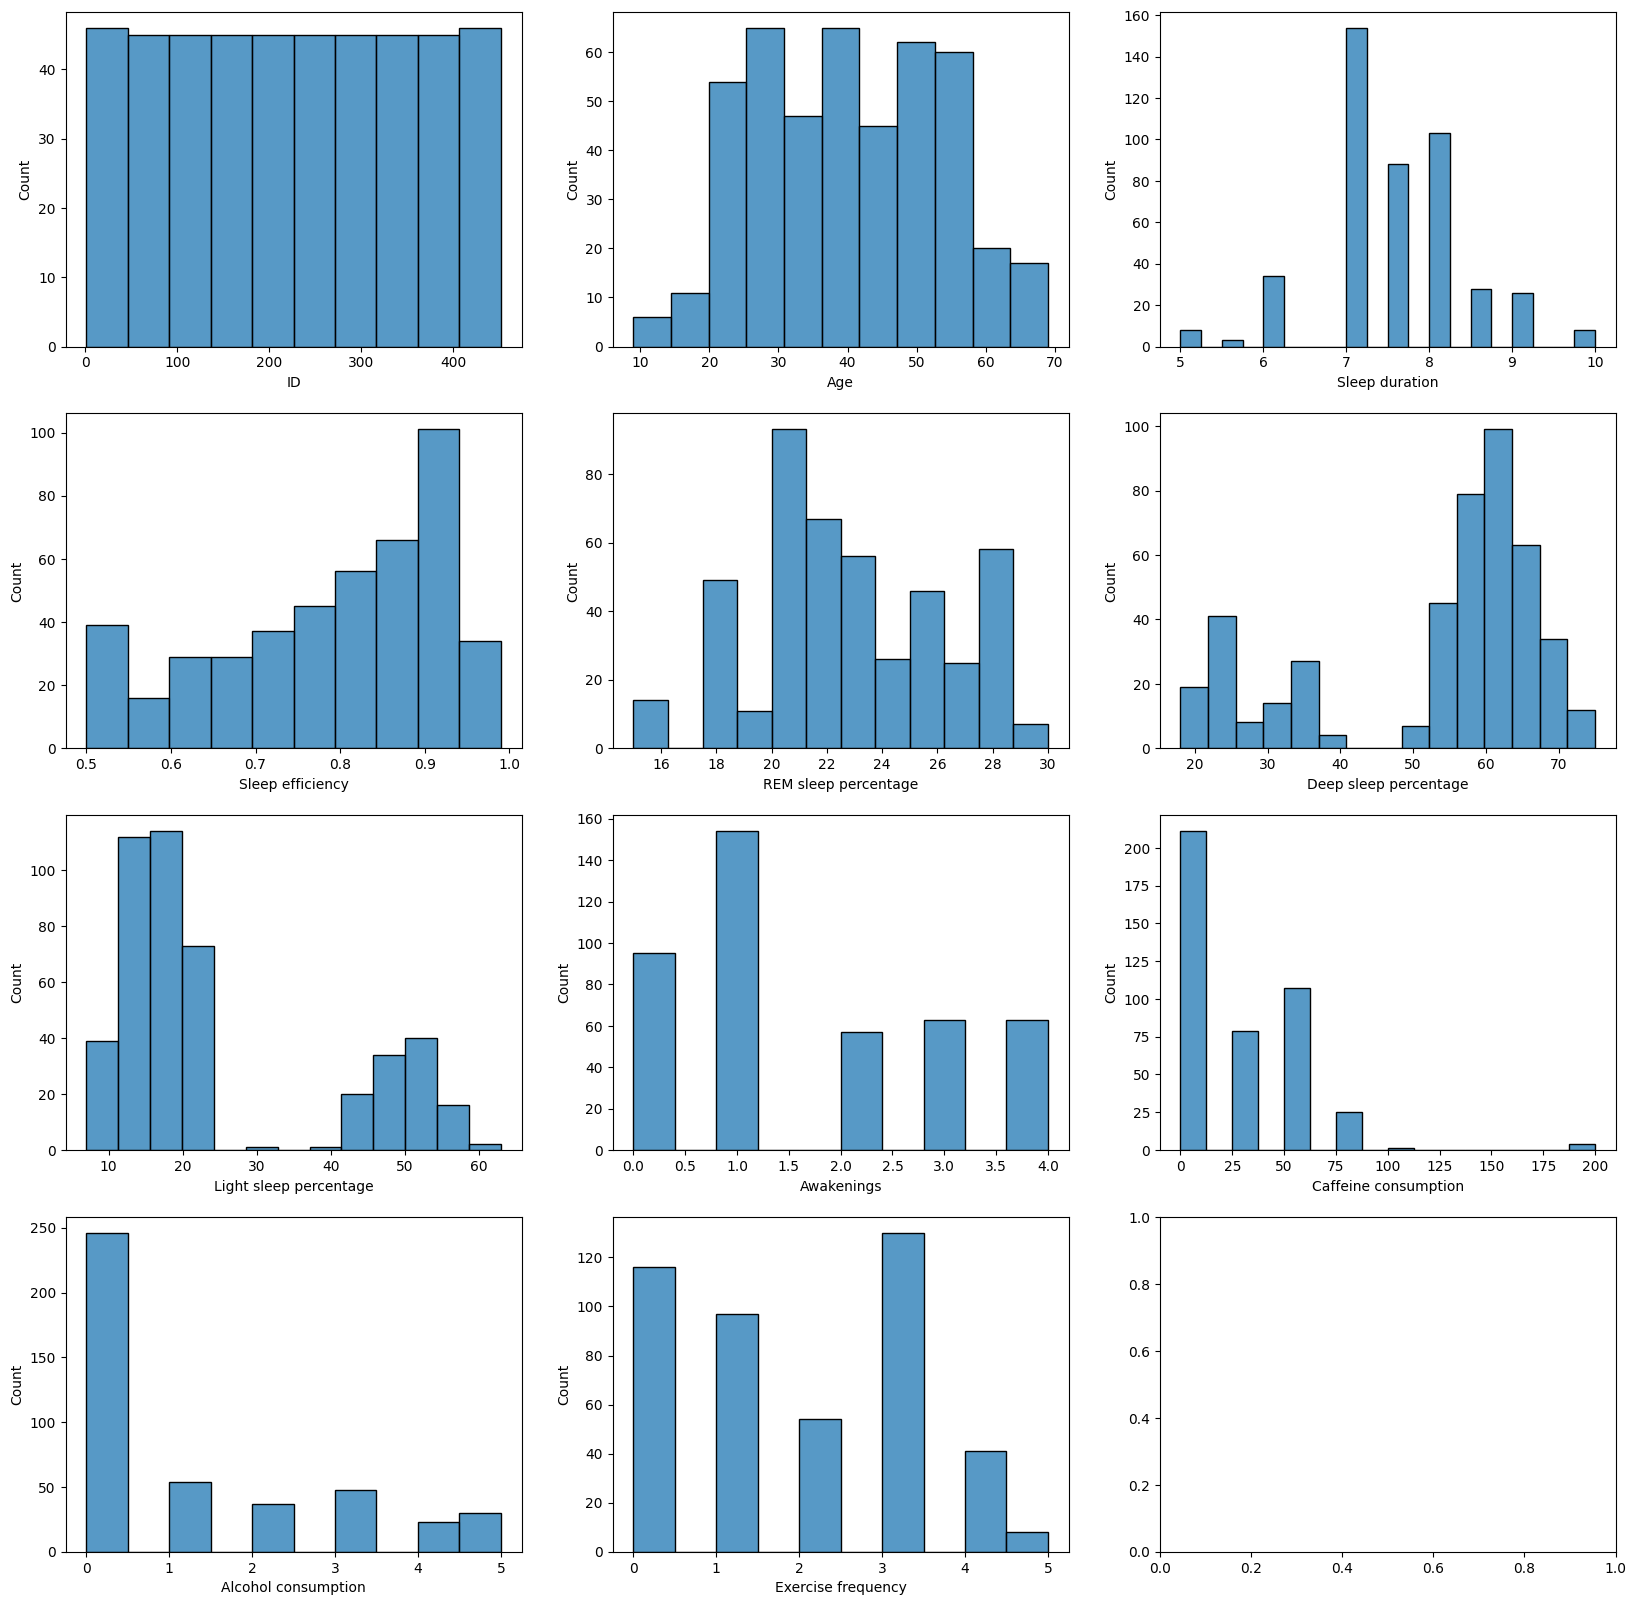

In [ ]:
#Plot distribution of numerical features
df_num = df.select_dtypes(include = 'number')
#df_num.head()
#df_num.hist()


fig, axs = plt.subplots(4,3, figsize=(20,20))

# Row 1
sns.histplot(data = df_num, x = 'ID',ax=axs[0,0])
sns.histplot(data = df_num, x = 'Age',ax=axs[0,1])
sns.histplot(data = df_num, x = 'Sleep duration',ax=axs[0,2])

# Row 2
sns.histplot(data = df_num, x = 'Sleep efficiency',ax=axs[1,0])
sns.histplot(data = df_num, x = 'REM sleep percentage',ax=axs[1,1])
sns.histplot(data = df_num, x = 'Deep sleep percentage',ax=axs[1,2])

# Row 3
sns.histplot(data = df_num, x = 'Light sleep percentage',ax=axs[2,0])
sns.histplot(data = df_num, x = 'Awakenings',ax=axs[2,1])
sns.histplot(data = df_num, x = 'Caffeine consumption',ax=axs[2,2])

# Row 4
sns.histplot(data = df_num, x = 'Alcohol consumption',ax=axs[3,0])
sns.histplot(data = df_num, x = 'Exercise frequency',ax=axs[3,1])

#Correlation Analysis

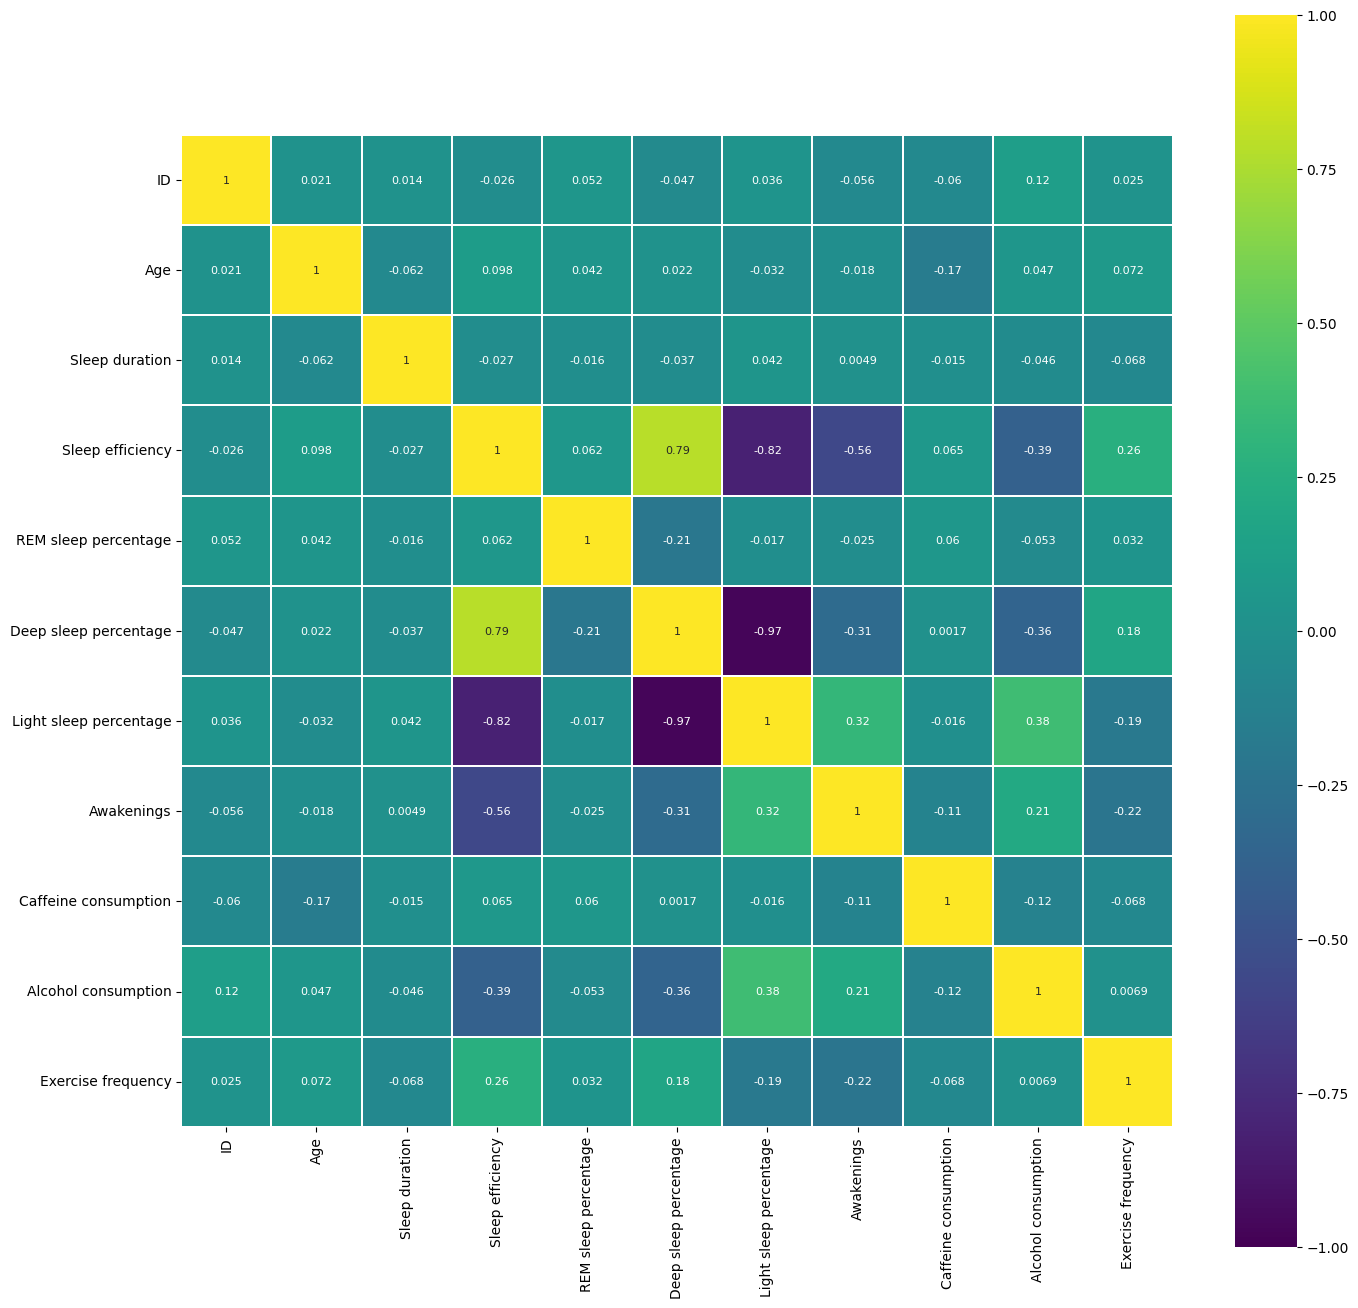

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
df_corr = numeric_df.corr()
plt.figure(figsize=(16, 16))

sns.heatmap(df_corr,
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

From this heatmap, we see the following negative correlations: light sleep percentage and sleep efficiency, light sleep percentage and deep sleep percentage, Awakenings and sleep efficiency.

We see the following positive correlations: deep sleep percentage and sleep efficiency, light sleep percentage and alcohol consumption, exercise frequency and sleep efficiency, awakenings and alcohol consumption.

These correlations are to name a few. The above heatmap shows the distribution of correlations for each of the column labels.

Find correlations with specific columns with correlation greater than abs(0.25) since the heat map doesn't show many correlations larger than 0.5

In [ ]:
#See which features are correlated with Alcohol Consumption
df_corr = df_num.corr()
df_corr_alc = df_corr['Alcohol consumption']

alc_golden_features_list = df_corr_alc[abs(df_corr_alc) > 0.25].sort_values(ascending=False)
print("There is {} weakly correlated values with Alcohol Consumption:\n{}".format(len(alc_golden_features_list), alc_golden_features_list))

There is 4 weakly correlated values with Alcohol Consumption:
Alcohol consumption       1.000000
Light sleep percentage    0.380571
Deep sleep percentage    -0.361731
Sleep efficiency         -0.389624
Name: Alcohol consumption, dtype: float64


In [ ]:
# See which features are correlated with Caffeine Consumption
df_corr_coffee = df_corr['Caffeine consumption']

coffee_golden_features_list = df_corr_coffee[abs(df_corr_coffee) > 0.25].sort_values(ascending=False)
print("There is {} weakly correlated values with Caffeine Consumption:\n{}".format(len(coffee_golden_features_list), coffee_golden_features_list))

There is 1 weakly correlated values with Caffeine Consumption:
Caffeine consumption    1.0
Name: Caffeine consumption, dtype: float64


In [ ]:
# See which features are correlated with Exercise Frequency
df_corr_ex = df_corr['Exercise frequency']

ex_golden_features_list = df_corr_ex[abs(df_corr_ex) > 0.25].sort_values(ascending=False)
print("There is {} weakly correlated values with Exercise Frequency:\n{}".format(len(ex_golden_features_list), ex_golden_features_list))

There is 2 weakly correlated values with Exercise Frequency:
Exercise frequency    1.000000
Sleep efficiency      0.259563
Name: Exercise frequency, dtype: float64


Next, we looked for features with a strong correlation to sleep efficiency:

In [ ]:
cor2 = df.corr()
cor_target = abs(cor2['Sleep efficiency'])
relevant_features = cor_target[cor_target>0.05]
df2 = df.loc[:,relevant_features.index]

<ipython-input-105-950f441a21e6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor2 = df.corr()


In [ ]:
df_corr = df_num.corr()['Sleep efficiency'][:-1]

golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)


golden_features_list.pop('Sleep efficiency')

print("There is {} strongly correlated values with Sleep Efficiency:\n{}".format(len(golden_features_list), golden_features_list))


There is 3 strongly correlated values with Sleep Efficiency:
Deep sleep percentage     0.787335
Awakenings               -0.564979
Light sleep percentage   -0.819204
Name: Sleep efficiency, dtype: float64


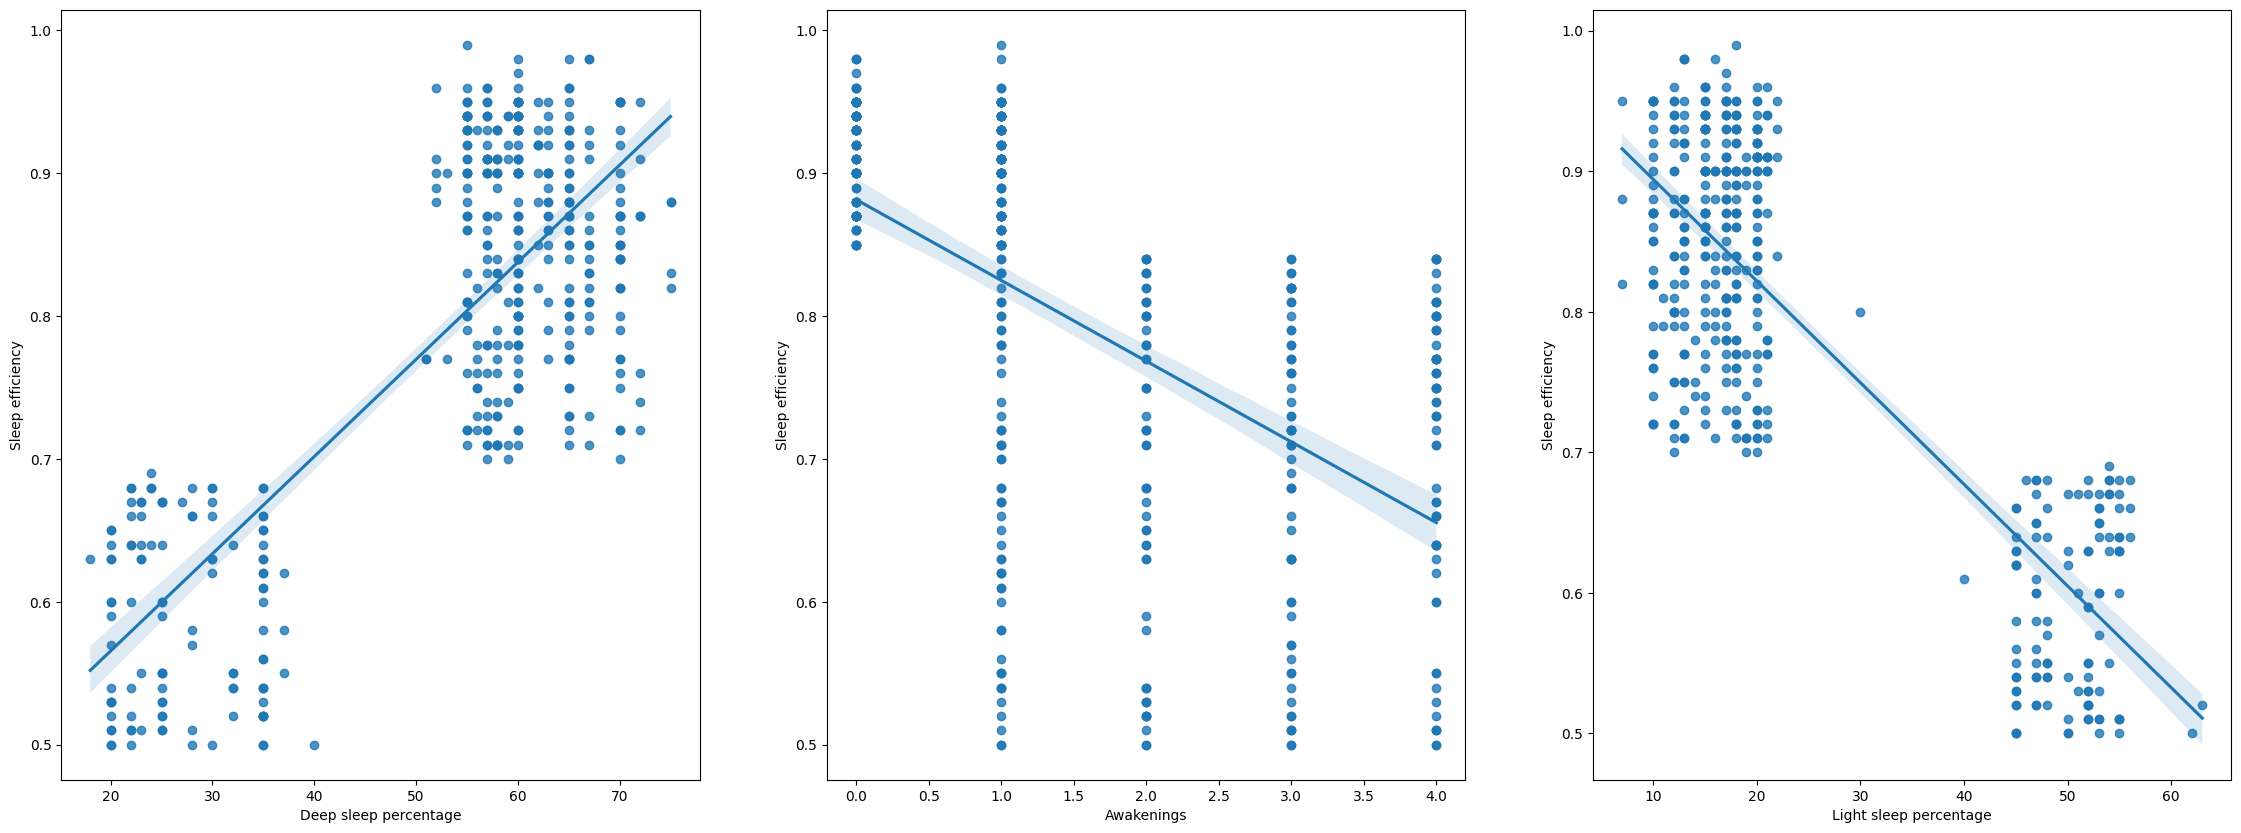

In [ ]:
fig, ax = plt.subplots(round(len(golden_features_list) / 3), 3 , figsize = (28, 10))

for i, ax in enumerate(fig.axes):
    if i < len(golden_features_list):
        ############################## write your code ###########################
        # TODO: plot regression plots for the selected golden features [hint: you can use sns.regplot]
        sns.regplot(x=golden_features_list.index[i],y='Sleep efficiency', data=df, ax=ax)

# Data PreProcessing

In [ ]:
# Let's load the dataset again so that we can see the missings
df = pd.read_csv('Sleep_Efficiency.csv')
df = df.rename(columns = {'Sleep efficiency': 'sleepEfficiency'})
y = df.sleepEfficiency
# We won't use any label information during data pre-processing and feature engineering
df.drop(['sleepEfficiency'], axis=1, inplace=True)

In [ ]:
df_na = (df.isna().sum()/len(df))*100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio
Caffeine consumption,5.530973
Awakenings,4.424779
Alcohol consumption,3.097345
Exercise frequency,1.327434


Text(0.5, 1.0, 'Percent missing data by features')

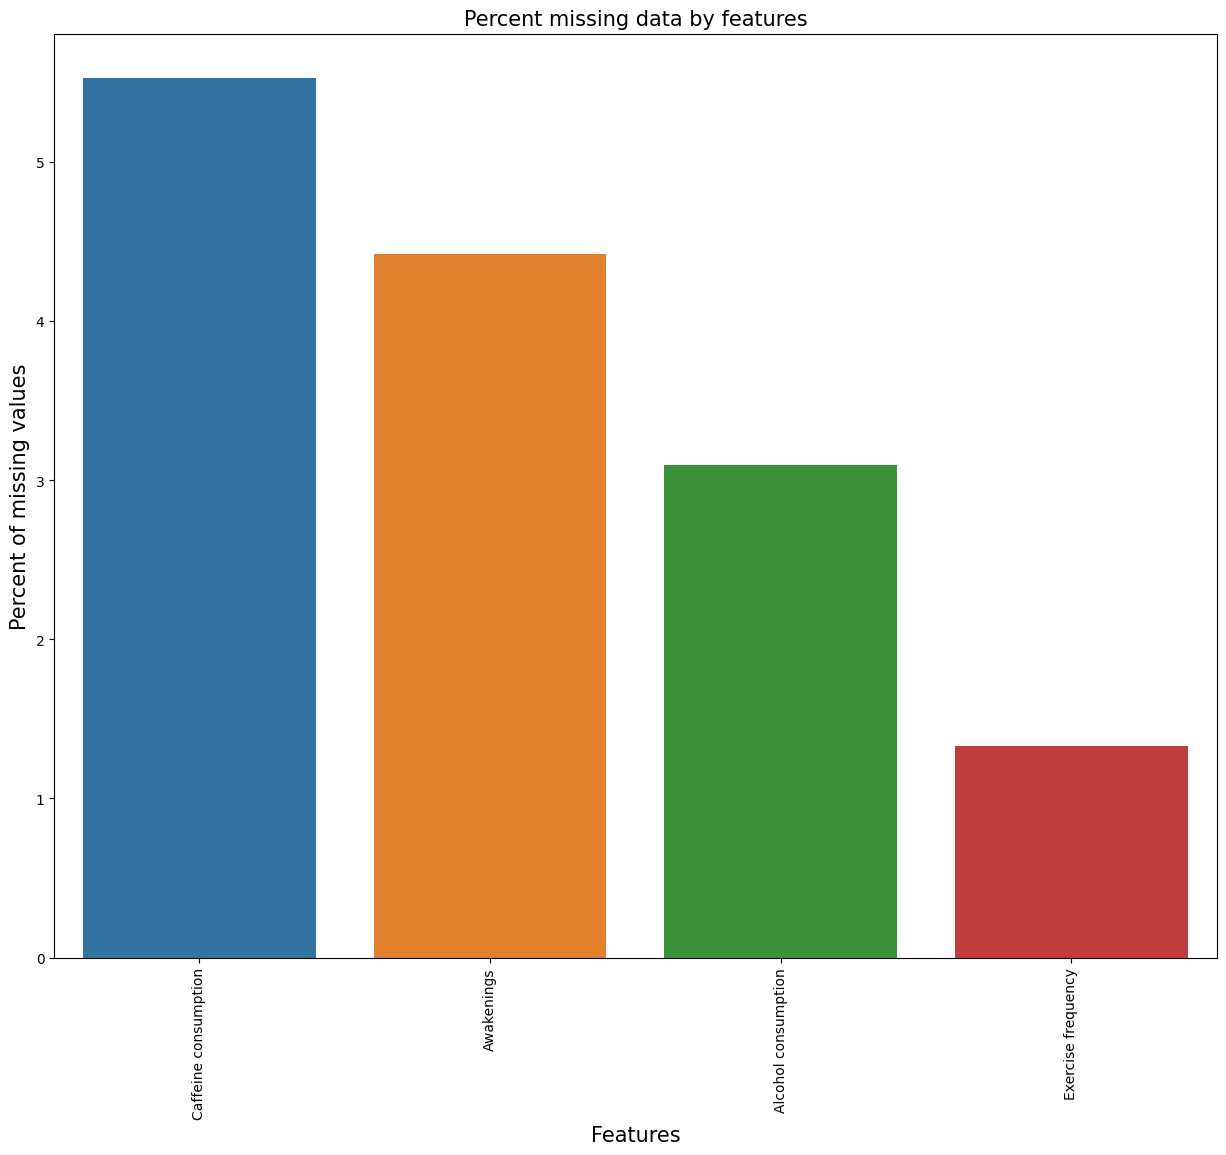

In [ ]:
# Visualize the missing ratios
f, ax = plt.subplots(figsize=(15, 12))
#plt.xticks(rotation='90')
plt.xticks(rotation='vertical')
sns.barplot(x=df_na.index, y=df_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by features', fontsize=15)

Caffeine Consumption: For those empty values of caffeine consumption, we assume this is because the subject does not consume caffeine. Therefore, we code N/A to be 0

In [ ]:
df["Caffeine consumption"] = df["Caffeine consumption"].fillna(0)

Awakenings: For those empty values of awakenings, we assume this is because the subject did not wake up. Therefore, we code N/A to be 0

In [ ]:
df["Awakenings"] = df["Awakenings"].fillna(0)

Alcohol Consumption: For those empty values of Alcohol, we assume this is because the subject does not drink alcohol - which is the average. Therefore, we code N/A to be 0

In [ ]:
df["Alcohol consumption"] = df["Alcohol consumption"].fillna(0)

Excercise Frequency: Because most people do excercise, we code this value to be the median value of 2

In [ ]:
df["Exercise frequency"] = df["Exercise frequency"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
df_na = (df.isna().sum()/len(df))*100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio


We have now filled all the missing values

# Feature Engineering

We are now going to check for skewness in numerical features:

In [ ]:
from scipy.stats import skew

numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Caffeine consumption,2.185041
Alcohol consumption,1.183364
Light sleep percentage,1.076687
Awakenings,0.539149
Exercise frequency,0.165796
REM sleep percentage,0.094953
Age,0.039768
Sleep duration,0.018721
ID,0.000000
Sleep efficiency,-0.648114


Box Cox Transformation of highly skewed features.

We have several highly skewed features, therefore we are running the box cox transformation

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features with enough skew to justify applying the Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #df[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)

There are 11 skewed numerical features with enough skew to justify applying the Box Cox transform


In [ ]:
df = pd.get_dummies(df)
print(df.shape)

(452, 873)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)

# Modelling

The first thing we are going to do is build a regression model with all featuers to observe our ability to determine sleep efficiency.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

In [ ]:
def average_error_rate(test, pred):
    diff = np.abs(test - pred)
    return np.divide(diff, test).mean()

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Training mean absolute error is: ", mean_absolute_error(y_train, y_pred_train))
print("Test mean absolute error is: ", mean_absolute_error(y_test, y_pred_test))
print()
print("Training mean error rate is: ", average_error_rate(y_train, y_pred_train))
print("Test mean error rate is: ", average_error_rate(y_test, y_pred_test))

Training mean absolute error is:  2.2882384286300793e-15
Test mean absolute error is:  0.05705712126690052

Training mean error rate is:  3.080461149344644e-15
Test mean error rate is:  0.07587902820755141


In [ ]:
test_mae_ = mean_absolute_error(y_test, y_pred_test)
test_error_ratio_ = average_error_rate(y_test, y_pred_test)

We observe that we mayhaps be overfitting the training data due to the extremely low error, but we still have a solid test error rate score.

Now we shall attempt our model with selected features

In [ ]:
X_train_w_label = X_train.copy()
X_train_w_label['Sleep efficiency'] = y_train

############################## write your code ###########################
# TODO: get golden_features_list with a correlation
# threshold of 0.05 using the method we've developed in EDA part
df_num_corr = df_num.corr()['Sleep efficiency'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.05].sort_values(ascending=False)

In [ ]:
model_selected_features = LinearRegression()

model_selected_features.fit(X_train[golden_features_list.index], y_train)
y_pred_train_ = model_selected_features.predict(X_train[golden_features_list.index])
y_pred_test_ = model_selected_features.predict(X_test[golden_features_list.index])
print("Training mean absolute error is: ", mean_absolute_error(y_train, y_pred_train_))
print("Test mean absolute error is: ", mean_absolute_error(y_test, y_pred_test_))
print()
print("Training mean error rate is: ", average_error_rate(y_train, y_pred_train_))
print("Test mean error rate is: ", average_error_rate(y_test, y_pred_test_))

Training mean absolute error is:  0.0028469516624378918
Test mean absolute error is:  0.00259321444385739

Training mean error rate is:  0.004032267209896743
Test mean error rate is:  0.0038253032420866775


In [ ]:
# Tune the threshold and find the best features set!
test_mae = [test_mae_]
test_error_ratios = [test_error_ratio_]
features_num = [X_train.shape[1]]

for thre in np.arange(0.01,0.7,0.01):
    X_train_corr = X_train_w_label.corr()['Sleep efficiency'][:-1] # -1 because the latest row is SalePrice
    golden_features_list = X_train_corr[abs(X_train_corr) >= thre].sort_values(ascending=False)
    features_num.append(len(golden_features_list))

    model_selected_features.fit(X_train[golden_features_list.index], y_train)
    y_pred_train_ = model_selected_features.predict(X_train[golden_features_list.index])
    y_pred_test_ = model_selected_features.predict(X_test[golden_features_list.index])
    test_mae.append(mean_absolute_error(y_test, y_pred_test_))
    test_error_ratios.append(average_error_rate(y_test, y_pred_test_))

Text(0, 0.5, 'Number of Features')

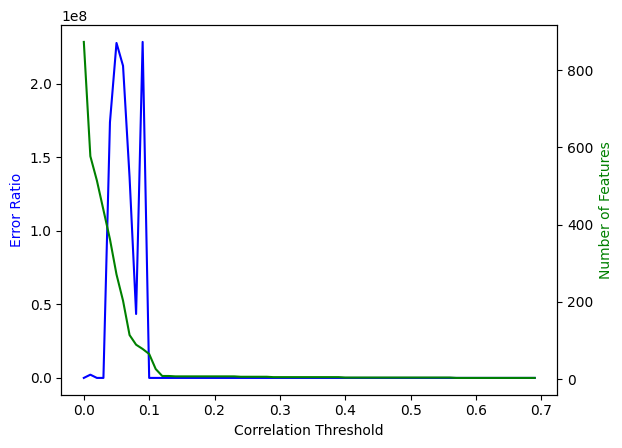

In [ ]:
# Plot features vs.
x_plot = np.arange(0.0,0.7,0.01)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x_plot, test_error_ratios, 'b-')
ax2.plot(x_plot, features_num, 'g-')

ax1.set_xlabel('Correlation Threshold')
ax1.set_ylabel('Error Ratio', color='b')
ax2.set_ylabel('Number of Features', color='g')